In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import torch
from itertools import combinations
from Openseas_Methods import *
import networkx
from tqdm import tqdm
from torch_geometric.utils.convert import from_networkx
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
from graph_utils import *
from network_utils import *
from GraphDataset import GraphDataset
from dataset_builder import process_dataset
import random
import pickle

In [2]:
dataset = GraphDataset('dataset_stor/graph_dataset_4_processed/graphs')

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# gcn = GCN().to(device)
# model_string = 'gnn_models/best_model_size_3_w_centroids.pt'
model_string = 'models/dataset4/train_model_slurm_batch_size_2.pt'
gcn = torch.load(model_string).to(device)
# checkpoint = torch.load(model_string)
# gcn.load_state_dict(checkpoint['model_state_dict'])

In [25]:
loader = DataLoader(dataset, batch_size=1)
optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.MSELoss()
gcn = train_node_classifier(gcn, loader, optimizer_gcn, criterion,3000,print_every=5,bin=False,best_val=30000,outpath='test_model.pt')
test_acc(gcn,loader,criterion,bin=False)

# test_acc = eval_node_classifier(gcn, graph_2, graph_2.test_mask,criterion,bin=False)
# print(f'Test Acc: {test_acc:.3f}')
# test_acc = plot_test(gcn, graph, graph.test_mask)


Epoch: 005, Train Loss: 28575.689
 Val Acc: 32810.328


KeyboardInterrupt: 

Model Loss:647.10205078125
Random Loss:931.3497314453125
Model Loss:597.2606201171875
Random Loss:855.2919311523438
Model Loss:512.2454223632812
Random Loss:761.9239501953125
Model Loss:603.1635131835938
Random Loss:848.22021484375
Model Loss:549.1111450195312
Random Loss:795.969482421875
Model Loss:597.2506103515625
Random Loss:881.49462890625
Model Loss:609.7603759765625
Random Loss:872.2914428710938
Model Loss:565.586181640625
Random Loss:875.8883056640625
Model Loss:579.798828125
Random Loss:792.016357421875
Model Loss:658.385009765625
Random Loss:920.2193603515625
Model Loss:585.9283447265625
Random Loss:828.1377563476562
Model Loss:618.5864868164062
Random Loss:770.9465942382812
Model Loss:649.5318603515625
Random Loss:889.8894653320312
Model Loss:583.7169799804688
Random Loss:788.787353515625
Model Loss:588.5151977539062
Random Loss:794.5297241210938
Model Loss:637.8861083984375
Random Loss:776.1674194335938
Model Loss:513.46240234375
Random Loss:769.4840087890625
Model Loss:577

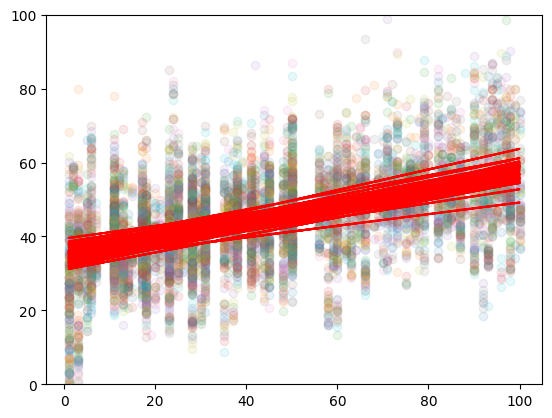

In [7]:
criterion = torch.nn.MSELoss()
loader = DataLoader(dataset, batch_size=1)
test_acc = []
for graph in loader:
    test_acc.append(plot_test(gcn,graph,graph.test_mask,criterion))
    # plt.show()
total_loss = sum([x[0] for x in test_acc])
bs_loss = sum([x[1] for x in test_acc])
print(total_loss,bs_loss)

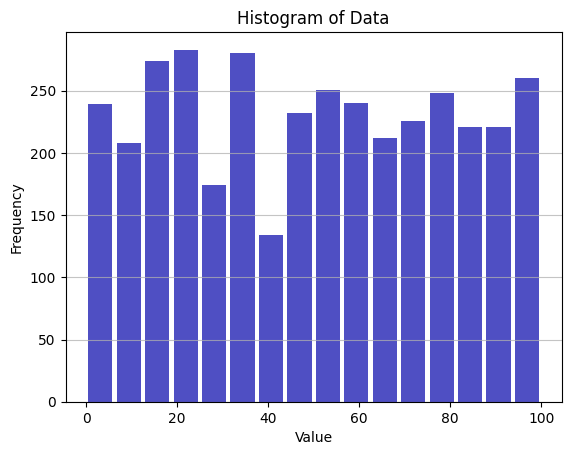

In [11]:
mask = graph_2.collection
plt.hist(graph_2.y[mask].cpu().detach(), bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

In [21]:
stats = label_to_stats.values()
floors = [x[0] for x in stats if x[0] is not None]
quantiles = make_quantiles(floors,10)
print(quantiles)
z_floor = [x for x in floors if x==0]

[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 8.000000e-04 3.000000e-03 6.900000e-03 1.098904e-02 3.800000e-02
 1.000000e+14]
